# Spaceship Titanic from Kaggle

#### Dataset description (from Kaggle)


In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.



#### File and Data Field Descriptions

-  __train.csv__ - Personal records for about two-thirds (approx 8700) of the passengers, to be used as training data.


    - _PassengerId_ - A unique Id for each passenger. Each Id takes the form _gggg_pp_ where _gggg_ indicates a group the passenger is travelling with and _pp_ is their number within the group. People in a group are often family members, but not always.

    - _HomePlanet_ - The planet the passenger departed from, typically their planet of permanent residence.

    - _CryoSleep_ - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

    - _Cabin_ - The cabin number where the passenger is staying. Takes the form _deck/num/side_, where side can be either _P_ for Port or _S_ for Starboard.

    - _Destination_ - The planet the passenger will be debarking to.

    - _Age_ - The age of the passenger.

    - _VIP_ - Whether the passenger has paid for special VIP service during the voyage.

    - _RoomService_, _FoodCourt_, _ShoppingMall_, _Spa_, _VRDeck_ - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

    - _Name_ - The first and last names of the passenger.

    - _Transported_ - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


- __test.csv__ - Personal records for the remaining one-third (approx 4300) of the passengers, to be used as test data. Your task is to predict the value of _Transported_ for the passengers in this set.

- __sample_submission.csv__ - A submission file in the correct format.

    - _PassengerId_ - Id for each passenger in the test set.


    - _Transported_ - The target. For each passenger, predict either _True_ or _False_.

## Loading the data and other imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("../Data/train.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 1. Exploratory Data Analysis

#### Transported

<Axes: xlabel='Transported', ylabel='count'>

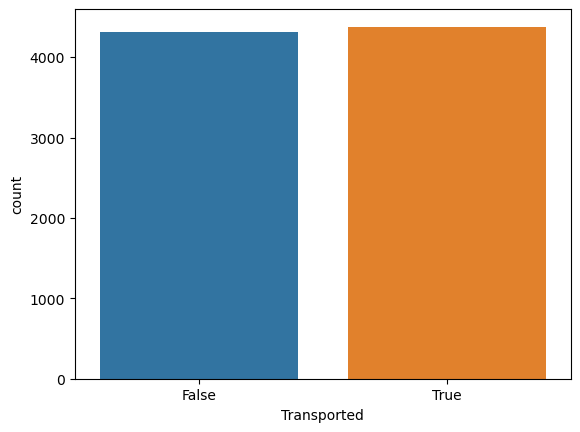

In [4]:
sns.countplot(data=df_train, x='Transported')

Approximately same number of transported than not transported

#### HomePlanet

<Axes: xlabel='HomePlanet', ylabel='count'>

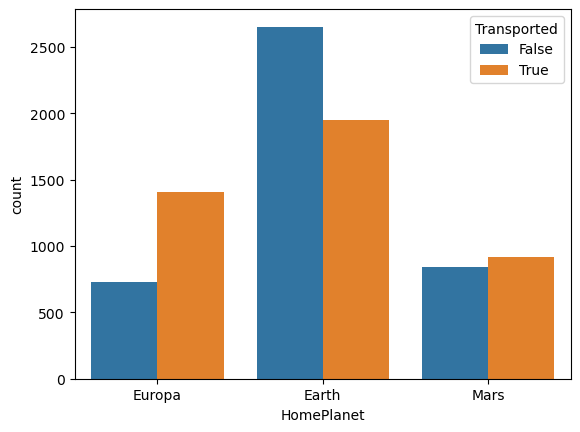

In [5]:
sns.countplot(data=df_train, x='HomePlanet', hue=df_train['Transported'].astype(str))

#### Destination

<Axes: xlabel='Destination', ylabel='count'>

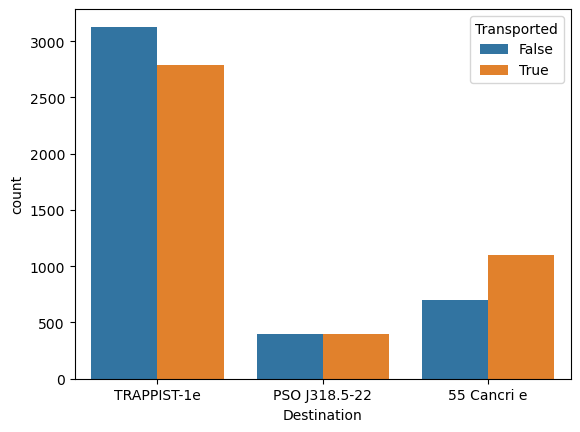

In [6]:
sns.countplot(data=df_train, x='Destination', hue=df_train['Transported'].astype(str))

#### Age

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<Axes: xlabel='Age', ylabel='Count'>

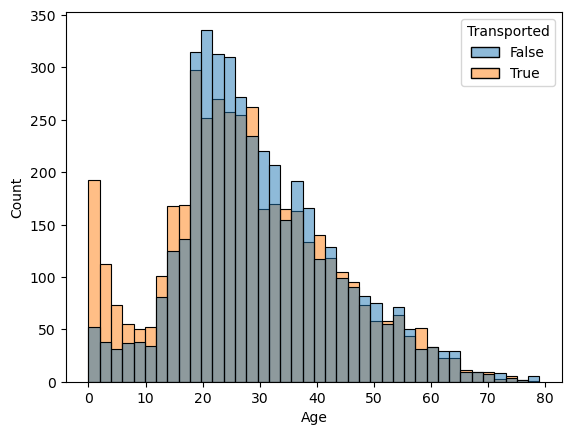

In [8]:
sns.histplot(data=df_train, x='Age', bins=40, hue='Transported')

#### VIP

In [9]:
df_train['VIP'].value_counts(normalize=True)

VIP
False    0.976561
True     0.023439
Name: proportion, dtype: float64

<Axes: xlabel='VIP', ylabel='count'>

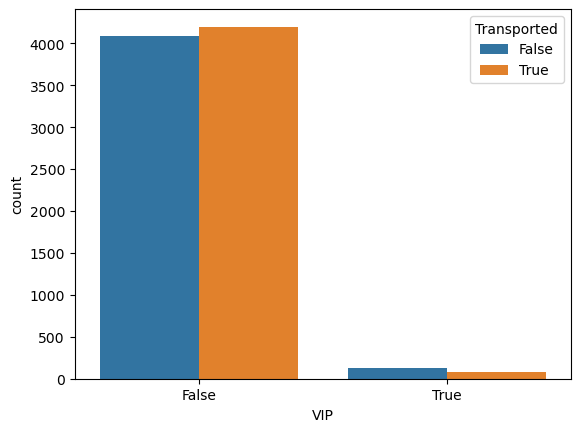

In [10]:
sns.countplot(data=df_train, x='VIP', hue=df_train['Transported'].astype(str))

In [11]:
df_train.groupby('VIP')['Transported'].value_counts(normalize=True)

VIP    Transported
False  True           0.506332
       False          0.493668
True   False          0.618090
       True           0.381910
Name: proportion, dtype: float64

### CryoSleep

<Axes: xlabel='CryoSleep', ylabel='count'>

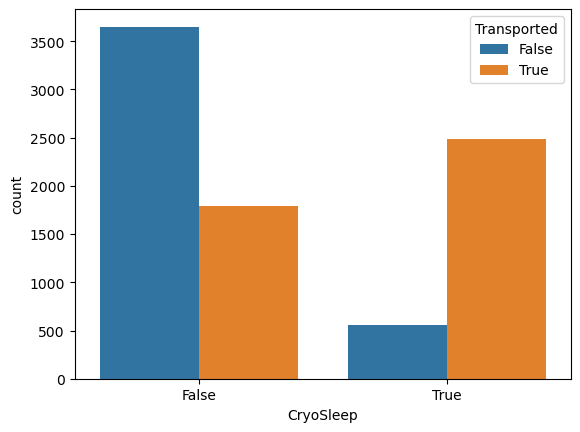

In [12]:
sns.countplot(data=df_train, x='CryoSleep', hue=df_train['Transported'].astype(str))

<Axes: xlabel='Age', ylabel='Count'>

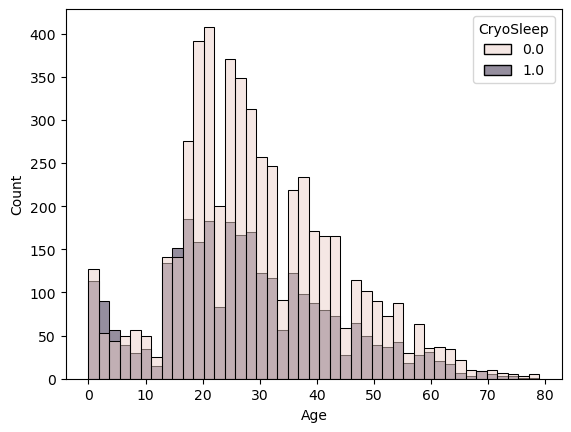

In [13]:
sns.histplot(data=df_train, x='Age', hue='CryoSleep')

#### Expenses

<Axes: xlabel='FoodCourt', ylabel='Spa'>

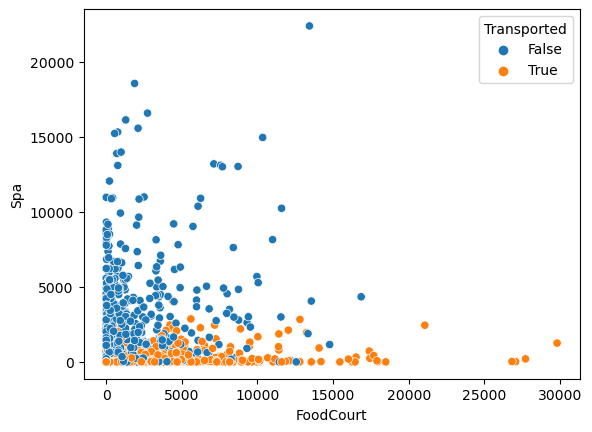

In [14]:
sns.scatterplot(data=df_train, x='FoodCourt', y='Spa', hue='Transported')

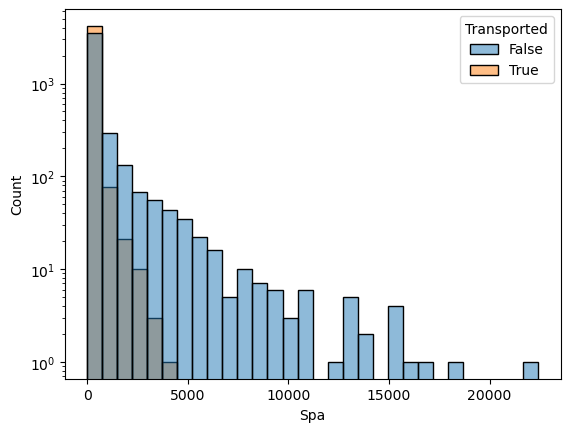

In [15]:
sns.histplot(data=df_train, x='Spa', hue='Transported', bins=30)
plt.yscale('log')

Nobody spending over 5000 in the Spa was trasported!

Text(0, 0.5, 'Total Spent')

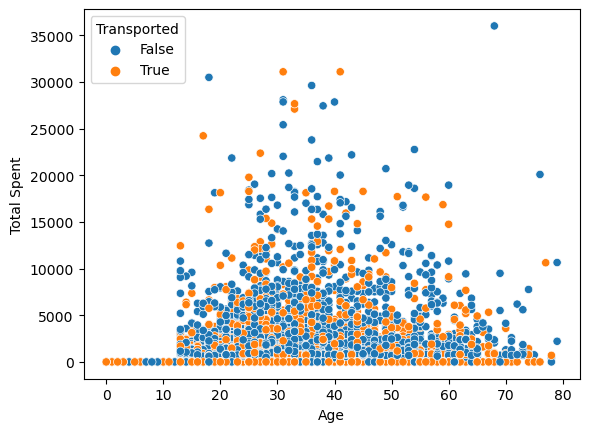

In [16]:
total_spent = (
    df_train['Spa'] 
    + df_train['FoodCourt'] 
    + df_train['VRDeck'] 
    + df_train['ShoppingMall'] 
    + df_train['RoomService']
)
 
sns.scatterplot(data=df_train, x='Age', y=total_spent, hue='Transported')
plt.ylabel('Total Spent')

No visible relation with total amount spent

#### Correlations

In [17]:
corr = df_train.select_dtypes(include='number').corr()
corr

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000


<Axes: >

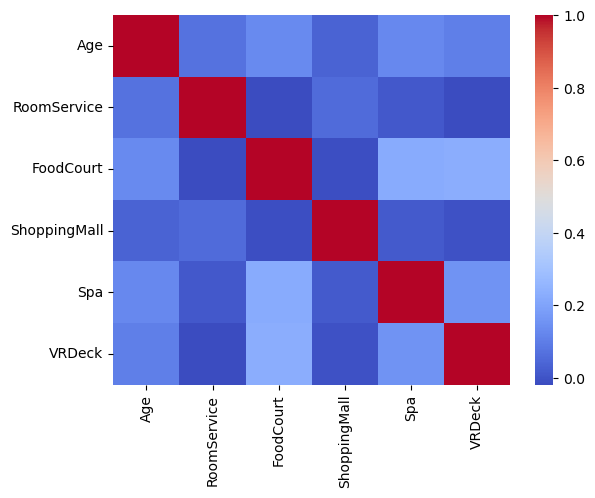

In [18]:
sns.heatmap(corr, cmap='coolwarm')

## 2. Data Preprocessing:

We want to apply the same data preprocessing to the train and test set, so we load the test set, add a new column to track the source, and fill the transported column in the test set as np.nan. We concatenate both datasets

In [19]:
df_test = pd.read_csv("../Data/test.csv")

In [20]:
df_train['source'] = 'train'
df_test['source'] = 'test'
df_test['Transported'] = np.nan

In [21]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  source        12970 non-null  object 
dtypes: float64(6), object(9)
memory usage: 1.5+ MB


### Missing data and feature engineering

In [22]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)

Transported     4277
CryoSleep        310
ShoppingMall     306
Cabin            299
VIP              296
Name             294
FoodCourt        289
HomePlanet       288
Spa              284
Destination      274
Age              270
VRDeck           268
RoomService      263
PassengerId        0
source             0
dtype: int64


<Axes: >

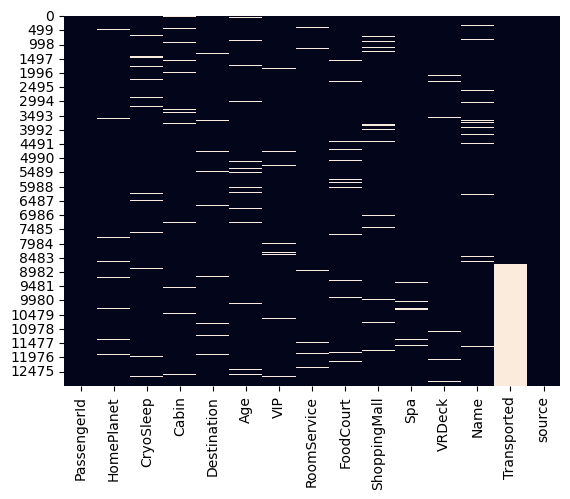

In [23]:
sns.heatmap(df.isnull(), cbar=False)

I set the missing values in the spending columns to 0 (many people actually also spent 0):

In [24]:
spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df[spend_cols] = df[spend_cols].fillna(0)

df['TotalSpent'] = df[spend_cols].sum(axis=1)

I set the missing values in VIP and CryoSleep variables to False (most common case)

In [25]:
df['CryoSleep'] = df['CryoSleep'].fillna(False)
df['VIP'] = df['VIP'].fillna(False)

I set the missing values in Age to the median age:

In [26]:
df['Age'] = df['Age'].fillna(df['Age'].median())

As HomePlanet and Destination are cathegorical columns with few cathegories, I set the missing values to 'Unknown':

In [27]:
df['HomePlanet'] = df['HomePlanet'].fillna('Unknown')
df['Destination'] = df['Destination'].fillna('Unknown')

The Name column probably does not add any relevant information, so we can drop it:

In [28]:
df.drop('Name', axis=1, inplace=True)

Finally, The Cabin column is a cathegorical column which has the structure deck/num/side. We want to divide this information into three columns, and we fill the missing data with:

Deck: 'Unknown'

CabinNumber: -1

Side: 'U'

In [29]:
# Create new empty columns
df['Deck'] = None
df['CabinNumber'] = None
df['Side'] = None

# Split the non missing columns
cabin_split = df['Cabin'].dropna().str.split('/', expand=True)
df.loc[cabin_split.index, 'Deck'] = cabin_split[0]
df.loc[cabin_split.index, 'CabinNumber'] = pd.to_numeric(cabin_split[1], errors='coerce')
df.loc[cabin_split.index, 'Side'] = cabin_split[2]

# Drop the original column
df.drop('Cabin', axis=1, inplace=True)

# Fill the missing values:
df['Deck'] = df['Deck'].fillna('Unknown')
df['Side'] = df['Side'].fillna('U')
df['CabinNumber'] = df['CabinNumber'].fillna(-1)

We don't have any more missing values:

<Axes: >

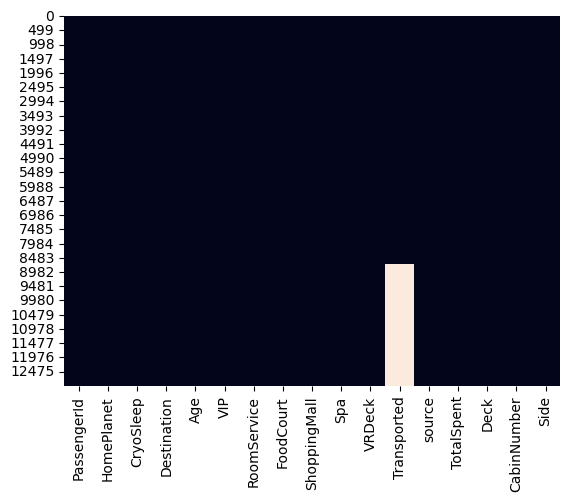

In [30]:
sns.heatmap(df.isnull(), cbar=False)

Let us explore the new variables:

<Axes: xlabel='Side', ylabel='count'>

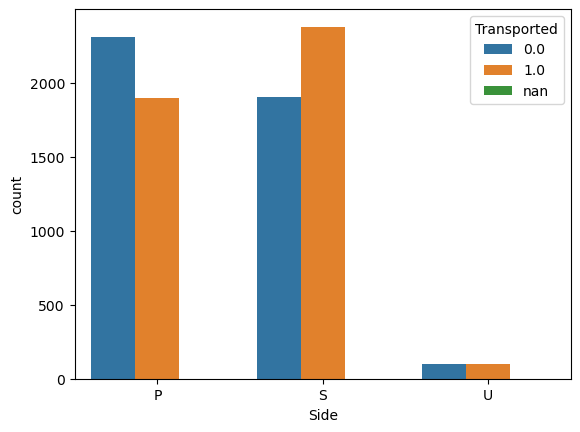

In [31]:
sns.countplot(data=df[df['Transported'].notna()], x='Side', hue=df['Transported'].astype(str))

<Axes: xlabel='Deck', ylabel='count'>

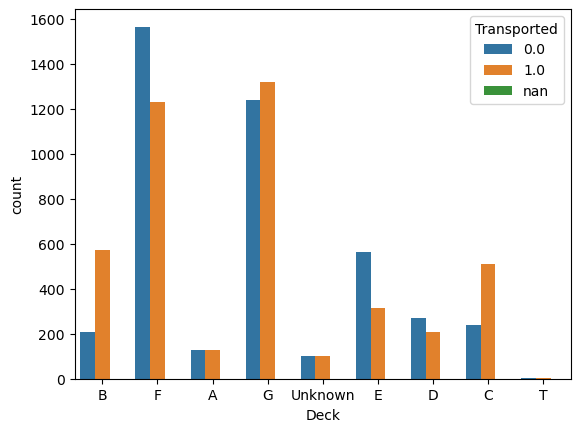

In [32]:
sns.countplot(data=df[df['Transported'].notna()], x='Deck', hue=df['Transported'].astype(str))

<Axes: xlabel='CabinNumber', ylabel='Count'>

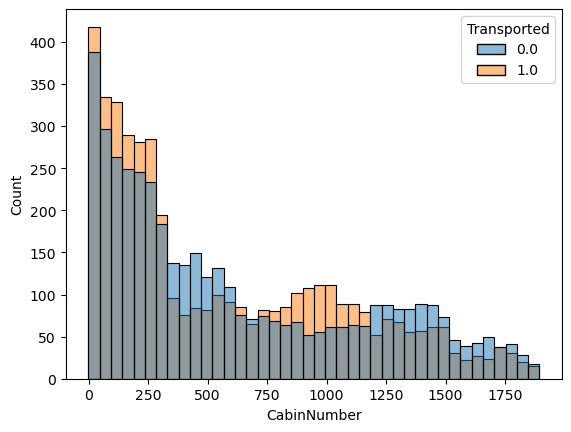

In [33]:
sns.histplot(data=df[df['Transported'].notna()], x='CabinNumber', bins=40, hue='Transported')

We create a column indicating group size and a column to indicate that the passenger is travelling alone:

In [34]:
# We take the group out of PassengerId: 
df['Group'] = df['PassengerId'].str.split('_').str[0]

# We add a group size column:
group_sizes = df['Group'].value_counts()
df['GroupSize'] = df['Group'].map(group_sizes)

# We further create a cathegorical column that indicates if a passenger is travelling alone:
df['IsAlone'] = df['GroupSize'] == 1

We notice that the people in the same group will probably come from the same HomePlanet, so we fill the 'Unknown' values with those of the people in the same group:

In [35]:
def FillHomePlanet(row, group_planet_map):
    if row['HomePlanet'] == 'Unknown' and not row['IsAlone']:
        group = row['Group']
        return group_planet_map.get(group, 'Unknown')  # Tries to find the Planet for that group in the dictionary, 
                                                       # and if it is not there, it returns 'Unknown'
    else:
        return row['HomePlanet']                       # If not Unknown or alone, changes nothing

In [36]:
# Create a dictionary of the most common Home Planet per group:
group_planet_map = (df[df['HomePlanet'] != 'Unknown'] # Filters only the known values
                    .groupby('Group')['HomePlanet']   # Groups by group and grabs the 
                    .agg(lambda x: x.mode().iloc[0])  # Takes the most common value
                    .to_dict()                        # Creates a dictionary out of it
                    )


In [37]:
df['HomePlanet'] = df.apply(lambda row: FillHomePlanet(row, group_planet_map), axis=1)

Finally we drop the PassengerId and Group columns:

In [38]:
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Group', axis=1, inplace=True)

### Categorical variables into usable format

In [39]:
def create_dummies_and_drop(col_name, dataframe):
    dumcols = pd.get_dummies(dataframe[col_name], prefix=col_name, drop_first=True).astype('int')
    dataframe_new = dataframe.join(dumcols)
    dataframe_new.drop(col_name, axis=1, inplace=True)
    return dataframe_new

In [40]:
obj_cols =  ['HomePlanet', 'Destination', 'Deck', 'Side'] 

for col in obj_cols:
    df = create_dummies_and_drop(col, df)

In [41]:
df['CryoSleep'] = df['CryoSleep'].astype(int)  
df['VIP'] = df['VIP'].astype(int)  
df['IsAlone'] = df['IsAlone'].astype(int)  

## 3. Modeling and Evaluation

### Train-test split and Scaling values

**Train-test split:** We first deattach the test set, and also we grab a subset from the train data to use as a validation set, to assess the performance of different models

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df[df['source'] == 'train'].drop(columns=['source', 'Transported'])
y = df[df['source'] == 'train']['Transported'].astype(int)

X_test = df[df['source'] == 'test'].drop(columns=['source', 'Transported'])

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=101)

**I normalize the data in X_train and X_val. We only fit it to the train data so we dont have a leakeage from the validation or test sets.**

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [46]:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

### Logistic RNegression

In [47]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

**Performance assessment:**

In [48]:
predictions_log = logmodel.predict(X_val)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_val, predictions_log))
# print(confusion_matrix(y_val, predictions_log))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79      1088
           1       0.80      0.73      0.77      1086

    accuracy                           0.78      2174
   macro avg       0.78      0.78      0.78      2174
weighted avg       0.78      0.78      0.78      2174



### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [51]:
predictions_rf = rfc.predict(X_val)

In [52]:
print(classification_report(y_val, predictions_rf))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1088
           1       0.83      0.79      0.81      1086

    accuracy                           0.81      2174
   macro avg       0.81      0.81      0.81      2174
weighted avg       0.81      0.81      0.81      2174



### Support Vector Machine

In [53]:
from sklearn.svm import SVC

In [54]:
SVCmodel = SVC()
SVCmodel.fit(X_train, y_train)

SVC()

In [55]:
predictions_SVC = SVCmodel.predict(X_val)

In [56]:
print(classification_report(y_val, predictions_SVC))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      1088
           1       0.83      0.70      0.76      1086

    accuracy                           0.78      2174
   macro avg       0.79      0.78      0.78      2174
weighted avg       0.79      0.78      0.78      2174



**Perform a grid search to find the best parameters for the model**

In [57]:
param_grid = {'C': [1, 10, 100, 1000, 10000], 'gamma': [1, 0.1 ,0.01, 0.001, 0.0001], 'kernel': ['rbf']} 

In [58]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.754 total time=   0.4s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.756 total time=   0.4s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.709 total time=   0.4s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.746 total time=   0.4s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.733 total time=   0.4s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.754 total time=   0.4s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.765 total time=   0.4s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.704 total time=   0.4s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.4s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.726 total time=   0.4s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.727 total time=   0.4s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [59]:
grid.best_params_

{'C': 10000, 'gamma': 0.01, 'kernel': 'rbf'}

In [60]:
grid_predictions = grid.predict(X_val)

In [61]:
print(classification_report(y_val, grid_predictions))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1088
           1       0.79      0.82      0.80      1086

    accuracy                           0.80      2174
   macro avg       0.80      0.80      0.80      2174
weighted avg       0.80      0.80      0.80      2174



### K-Nearest Neighbors

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier(n_neighbors=1) #Now we are taking k = 1, but later we check which k to take for a precision-cost trade-off
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [64]:
predictions_KNN = knn.predict(X_val)

In [65]:
print(classification_report(y_val, predictions_KNN))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1088
           1       0.73      0.73      0.73      1086

    accuracy                           0.73      2174
   macro avg       0.73      0.73      0.73      2174
weighted avg       0.73      0.73      0.73      2174



**Let's check which _k_ to pick, using the elbow method:**

In [66]:
error_rate = []

for i in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    error_rate.append(np.mean(pred_i != y_val))

Text(0, 0.5, 'Error Rate')

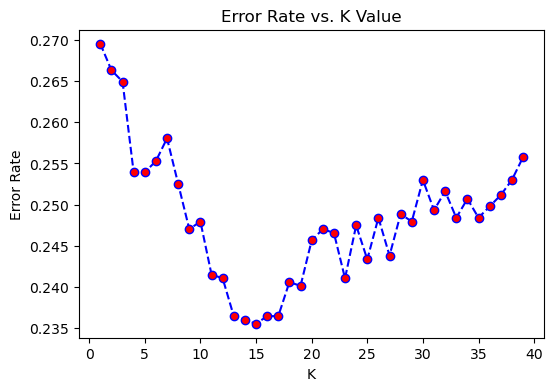

In [67]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=6)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [68]:
knn15 = KNeighborsClassifier(n_neighbors=15) #We take k = 15
knn15.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [69]:
predictions_KNN = knn.predict(X_val)
print(classification_report(y_val, predictions_KNN))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1088
           1       0.78      0.68      0.73      1086

    accuracy                           0.74      2174
   macro avg       0.75      0.74      0.74      2174
weighted avg       0.75      0.74      0.74      2174



Not that much improvement

### Neural Networks

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#### Model 1: Adam optimizer, no dropout layers, no early stopping

In [71]:
model1 = Sequential()

model1.add(Dense(units=28, activation='relu'))
# model.add(Dropout(0.5))

model1.add(Dense(units=14, activation='relu'))
# model.add(Dropout(0.5))

model1.add(Dense(units=1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam')

In [72]:
model1.fit(x=X_train, 
          y=y_train, 
          epochs=40,
          batch_size=256,
          validation_data=(X_val, y_val), verbose=1
          )

Epoch 1/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6791 - val_loss: 0.6473
Epoch 2/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6436 - val_loss: 0.6085
Epoch 3/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6011 - val_loss: 0.5671
Epoch 4/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5694 - val_loss: 0.5375
Epoch 5/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5355 - val_loss: 0.5207
Epoch 6/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5280 - val_loss: 0.5116
Epoch 7/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5147 - val_loss: 0.5052
Epoch 8/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5148 - val_loss: 0.4985
Epoch 9/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4939 - val_loss: 0.4883
Epoch 10/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4937 - val_loss: 0.4808
Epoch 11/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4913 - val_loss: 0.4738
Epoch 12/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4785 - val_lo

<Axes: >

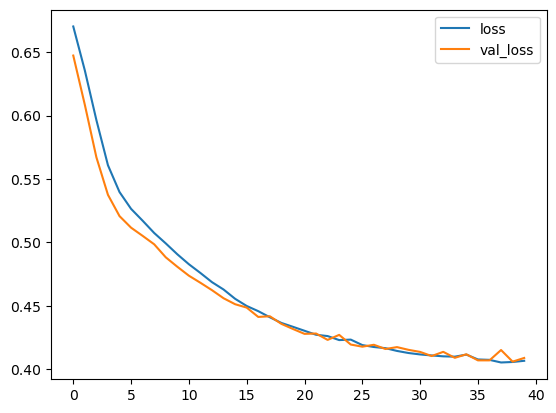

In [73]:
model_loss = pd.DataFrame(model1.history.history)
model_loss.plot()

In [74]:
predictions_1 = (model1.predict(X_val) > 0.5).astype("int")

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


In [75]:
print(classification_report(y_val, predictions_1))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1088
           1       0.79      0.84      0.81      1086

    accuracy                           0.81      2174
   macro avg       0.81      0.81      0.81      2174
weighted avg       0.81      0.81      0.81      2174



#### Model 2: rmsprop optimizer, dropout layers, early stopping

In [76]:
model2 = Sequential()

model2.add(Dense(units=28, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(units=14, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(units=1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='rmsprop')

In [77]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [78]:
model2.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_val, y_val), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.6904 - val_loss: 0.6569
Epoch 2/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.6559 - val_loss: 0.5928
Epoch 3/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 0.6052 - val_loss: 0.5503
Epoch 4/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 0.5990 - val_loss: 0.5249
Epoch 5/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 0.5658 - val_loss: 0.5161
Epoch 6/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 0.5528 - val_loss: 0.5040
Epoch 7/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 0.5462 - val_loss: 0.4983
Epoch 8/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 0.5393 - val_loss: 0.4913
Epoch 9/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 0.5293 - val_loss: 0.4842
Epoch 10/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 0.5214 - val_loss: 0.4795
Epoch 11/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 0.5119 - val_loss: 0.4733
Epoch 12/600
204/20

<Axes: >

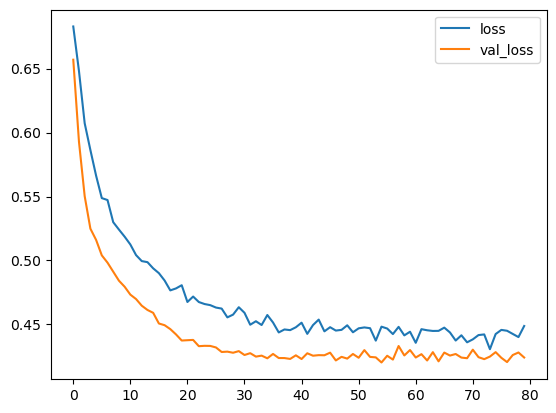

In [79]:
model2_loss = pd.DataFrame(model2.history.history)
model2_loss.plot()

In [80]:
predictions_2 = (model2.predict(X_val) > 0.5).astype("int")
print(classification_report(y_val, predictions_2))

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1088
           1       0.80      0.82      0.81      1086

    accuracy                           0.81      2174
   macro avg       0.81      0.81      0.81      2174
weighted avg       0.81      0.81      0.81      2174



#### Model 3: More layers, adam optimizer, dropout layers, early stopping

In [81]:
model3 = Sequential()

model3.add(Dense(units=28, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(units=56, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(units=14, activation='relu'))
model3.add(Dropout(0.2)) 

model3.add(Dense(units=7, activation='relu'))

model3.add(Dense(units=1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer='adam')

In [82]:
model3.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_val, y_val), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - loss: 0.6970 - val_loss: 0.6759
Epoch 2/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.6689 - val_loss: 0.5611
Epoch 3/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.6076 - val_loss: 0.5403
Epoch 4/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.5732 - val_loss: 0.5089
Epoch 5/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.5532 - val_loss: 0.5059
Epoch 6/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.5411 - val_loss: 0.4933
Epoch 7/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.5218 - val_loss: 0.4837
Epoch 8/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 0.5255 - val_loss: 0.4714
Epoch 9/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.5063 - val_loss: 0.4651
Epoch 10/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.5034 - val_loss: 0.4603
Epoch 11/600
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.4910 - val_loss: 0.4539
Epoch 12/600
204/20

In [83]:
predictions_3 = (model3.predict(X_val) > 0.5).astype("int")
print(classification_report(y_val, predictions_3))

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1088
           1       0.81      0.82      0.82      1086

    accuracy                           0.82      2174
   macro avg       0.82      0.82      0.82      2174
weighted avg       0.82      0.82      0.82      2174



### Model comparison

In this dataset, the two output classes are balanced so we can check the accuracy as a good metric. We also check the F1 score, which combines precision and recall into a single metric, to ensure that the models perform consistently across both classes.

| Model           | Accuracy | Macro F1 |
|----------------|----------|----------|
| LogisticReg    | 0.78     | 0.78     |
| Random Forest  | **0.81**     | **0.81**     |
| Support Vector Machine        | 0.78     | 0.78     |
| Support Vector Machine        | 0.78     | 0.78     |
| K-Nearest Neighbors        | 0.73     | 0.73     |
| Neural Network 1        | **0.81**     | **0.81**     |
| Neural Network 2        | **0.81**     | **0.81**     |
| Neural Network 3        | **0.81**     | **0.81**     |



The models **Random Forest**, **Neural Network 1**, **Neural Network 2** and **Neural Network 3** perform similarly in terms of overall accuracy and macro-average F1, but **Neural Network 3** offers the most balanced performance across both classes. It achieves slightly better recall for _Transported = True_ without sacrificing precision, making it the safest and most robust choice for general use.

## 4. Submission

**We fit the scaler to the whole train set, and rescale the train and test set**

In [84]:
scaler.fit(X)

X = scaler.transform(X)
X_test = scaler.transform(X_test)

**We retrain the model on the whole training set (X_train + X_val), and prepare the submission file with the predictions for the test set:**

In [85]:
model3.fit(x=X, 
          y=y, 
          epochs=96, #What early stopping found before
          verbose=1
          )

Epoch 1/96
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 0.4097
Epoch 2/96
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.4087
Epoch 3/96
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.4064
Epoch 4/96
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.4045
Epoch 5/96
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 0.4190
Epoch 6/96
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.4083
Epoch 7/96
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.4018
Epoch 8/96
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.4101
Epoch 9/96
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.4073
Epoch 10/96
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.4115
Epoch 11/96
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.3991
Epoch 12/96
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.3866
Epoch 13/96
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 0.4020
Epoch 14/96
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.4178
Epoch 15/96
272/272 ━━━━━━━━━

In [86]:
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': (model3.predict(X_test) > 0.5).astype(bool).flatten()
})

submission.to_csv("../Submission/submission.csv", index=False)

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step


## 5. Conclussion

In this notebook, I explored the Spaceship Titanic dataset, performed preprocessing and feature engineering, and trained several classification models. After comparing their performance using accuracy and F1-score, I selected **Neural Network 3** as the final model based on its balanced performance across both classes.

The final model was retrained on the full training set and used to generate predictions on the test set. These predictions were exported to `submission.csv` and are ready for submission to Kaggle.

### Best model:
- Model: Neural Network 3
- Validation accuracy: 0.81
- Macro F1-score: 0.81